# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

In [1]:
import pandas as pd
import numpy as np
import math
import json
% matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

# Exploring All 3 DataSet and cleaning it Simultaneously

# 1.Portfolio

In [2]:
portfolio.head()

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


In [3]:
portfolio.shape


(10, 6)

In [4]:
portfolio.describe()

,difficulty,duration,reward
count,10.000000,10.000000,10.000000
mean,7.700000,6.500000,4.200000
std,5.831905,2.321398,3.583915
min,0.000000,3.000000,0.000000
25%,5.000000,5.000000,2.000000
50%,8.500000,7.000000,4.000000
75%,10.000000,7.000000,5.000000
max,20.000000,10.000000,10.000000


In [5]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
channels      10 non-null object
difficulty    10 non-null int64
duration      10 non-null int64
id            10 non-null object
offer_type    10 non-null object
reward        10 non-null int64
dtypes: int64(3), object(3)
memory usage: 560.0+ bytes


In [6]:
portfolio.columns

Index(['channels', 'difficulty', 'duration', 'id', 'offer_type', 'reward'], dtype='object')

In [7]:
from sklearn.metrics import fbeta_score, accuracy_score, f1_score
from time import time
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

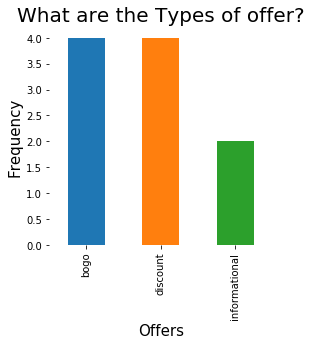

In [8]:
ax = portfolio["offer_type"].value_counts().plot.bar(
    figsize=(4,4),
    fontsize=10

)

ax.set_title("What are the Types of offer?", fontsize=20)
ax.set_xlabel("Offers", fontsize=15)
ax.set_ylabel("Frequency", fontsize=15)
sns.despine(bottom=True, left=True)

from the bar graph we can see that 3 types of offer have made by 10 entries
Now we will be cleaining the portfolio , profile and trascripy df and will be using One hot encoding method.
One-Hot Encoding is another popular technique for treating categorical variables.
It simply creates additional features based on the number of unique values in the categorical feature.
Every unique value in the category will be added as a feature. 
One-Hot Encoding is the process of creating dummy variables.

# Cleaning PORTFOLIO dataset

### we will be passing the portfolio dataset in clean_portfolio which will return new dataset after one hot encoding

In [9]:
def clean_portfolio(df=portfolio):
    
    # One-hot encode channels column
    
    channels = portfolio["channels"].str.join(sep="*").str.get_dummies(sep="*")
    
    # One-hot encode offer_type column
    offer_type = pd.get_dummies(portfolio['offer_type'])
    
    # Concatinating one-hot and df
    new_df = pd.concat([df, channels, offer_type], axis=1, sort=False)
    
    # Removing channels and offer_type
    new_df = new_df.drop(['channels', 'offer_type'], axis=1)
    
    # Organizing columns
    columns = ["id", "difficulty", "duration", "reward", "email", "mobile", "social", "web", "bogo", "discount", "informational"]
    new_df = new_df[columns]
    
    return new_df

In [10]:
cleaned_portfolio= clean_portfolio() 
cleaned_portfolio.head()

,id,difficulty,duration,reward,email,mobile,social,web,bogo,discount,informational
0,ae264e3637204a6fb9bb56bc8210ddfd,10,7,10,1,1,1,0,1,0,0
1,4d5c57ea9a6940dd891ad53e9dbe8da0,10,5,10,1,1,1,1,1,0,0
2,3f207df678b143eea3cee63160fa8bed,0,4,0,1,1,0,1,0,0,1
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,7,5,1,1,0,1,1,0,0
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,20,10,5,1,0,0,1,0,1,0


# 2 Profile 



In [11]:
profile.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [12]:
profile.shape

(17000, 5)

In [13]:
profile.columns

Index(['age', 'became_member_on', 'gender', 'id', 'income'], dtype='object')

In [14]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null int64
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.1+ KB


In [15]:
profile.isnull().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

In [16]:
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


In [17]:
#checking different age values
profile.age.value_counts()



118    2175
58      408
53      372
51      363
54      359
59      359
57      353
52      351
55      350
56      342
63      338
60      333
49      321
62      318
67      317
64      311
61      309
48      288
50      284
66      284
65      280
68      259
70      252
69      242
47      232
45      231
71      230
42      227
43      215
46      212
       ... 
22      131
30      131
29      129
23      126
81      118
35      118
79      117
80      116
31      113
82      105
83      102
84       83
18       70
85       70
87       66
88       64
86       54
89       53
90       52
91       47
92       40
94       33
93       29
95       22
97       13
100      12
96        8
98        5
99        5
101       5
Name: age, Length: 85, dtype: int64

In [18]:
#checking for gender
profile.gender.value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

 as we can see there are significantly more men that women we can now see that using the bargraph as well


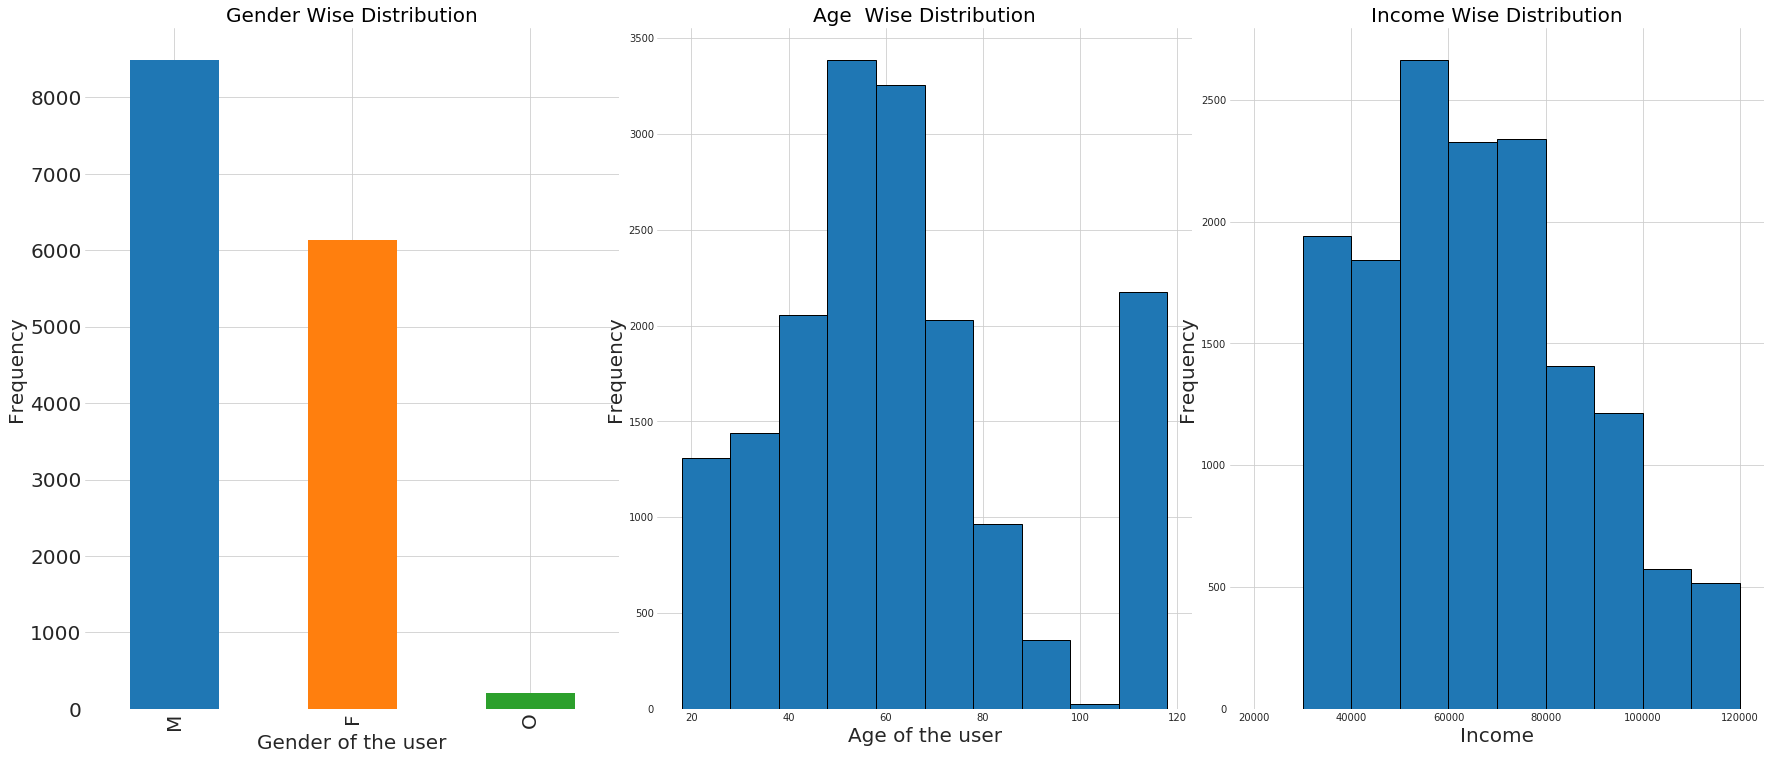

In [19]:
#Creating bar graph

sns.set_style('whitegrid')
fig,ax= plt.subplots(1,3,sharex=False, sharey=False,figsize=(24,10))
fig.tight_layout()
# For GENDER
profile.gender.value_counts().plot.bar(ax=ax[0],fontsize=20) 
ax[0].set_title("Gender Wise Distribution", fontsize=20,color='black')
ax[0].set_xlabel("Gender of the user", fontsize=20)
ax[0].set_ylabel("Frequency", fontsize=20)
sns.despine(bottom=True, left=True)


# For AGE
profile.age.plot.hist(ax=ax[1],fontsize=10,edgecolor='black') 
ax[1].set_title("Age  Wise Distribution", fontsize=20,color='black')
ax[1].set_xlabel("Age of the user", fontsize=20)
ax[1].set_ylabel("Frequency", fontsize=20)
sns.despine(bottom=True, left=True)

# For INCOME
profile.income.plot.hist(ax=ax[2],fontsize=10,edgecolor='black',range=(20000, 120000)) 
ax[2].set_title("Income Wise Distribution", fontsize=20,color='black')
ax[2].set_xlabel("Income", fontsize=20)
ax[2].set_ylabel("Frequency", fontsize=20)
sns.despine(bottom=True, left=True)
plt.show()

In [20]:
profile[profile['age']== 118]

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN
6,118,20170925,None,8ec6ce2a7e7949b1bf142def7d0e0586,NaN
7,118,20171002,None,68617ca6246f4fbc85e91a2a49552598,NaN
9,118,20161122,None,8974fc5686fe429db53ddde067b88302,NaN
10,118,20170824,None,c4863c7985cf408faee930f111475da3,NaN
11,118,20150919,None,148adfcaa27d485b82f323aaaad036bd,NaN
17,118,20170801,None,744d603ef08c4f33af5a61c8c7628d1c,NaN
23,118,20170907,None,2b826eba31074a059d63b0ae8f50b7d5,NaN


### We can see gender and Income are missing in the values ,it can be concluded that all the missing values are stored in age 118




In [21]:
# So only checking the age that are above 75 below 118
profile[(profile['age'] > 75) & (profile['age'] < 118)]

,age,became_member_on,gender,id,income
22,78,20170616,F,c27e0d6ab72c455a8bb66d980963de60,71000.0
33,96,20171117,F,868317b9be554cb18e50bc68484749a2,89000.0
50,79,20150415,F,a3b9b4bf115e4564933ea2e4bc936843,48000.0
58,78,20161009,F,fe8264108d5b4f198453bbb1fa7ca6c9,93000.0
64,76,20180314,F,ab66a363907e43e9a7cd535f1578245b,47000.0
68,77,20160730,M,d8af520c4a8a4c77b921098d7d838c4d,51000.0
69,76,20140831,M,39dbcf43e24d41f4bbf0f134157e0e1e,64000.0
88,78,20151111,M,571b739ada3041fb8fbd20f23ce034f7,58000.0
94,89,20171114,F,4264b1d027cc493281bba4f44bfedaca,87000.0
98,90,20151210,F,1c587de019994f93a242c6864fd7bc55,98000.0


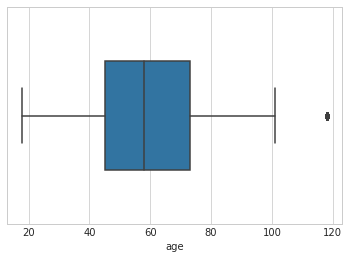

In [22]:
# Plotting a boxplot to see where majority of age group falls

sns.boxplot(profile['age'], width=0.5)

# Cleaning PROFILE dataset


### we will be passing the profile dataset in clean_profile which will return new dataset after one hot encoding

In [23]:
def clean_profile(profile = profile):

    # droping lines with income = NaN and age == 118(because null values are stored here)
    new_df = profile.drop(profile[(profile["income"].isnull()) & (profile["age"] == 118)].index)
    
    # One-hot encode Gender column
    gender_dummies = pd.get_dummies(new_df["gender"])
    
    # Specifying age range and one hot encoding
    range_ages = pd.cut(x=new_df["age"], bins=[18, 20, 29, 39, 49, 59, 69, 79, 89, 99, 102])
    # One-hot encode age column
    ages_dummies = pd.get_dummies(range_ages)
    
    # Specifying income range and one hot encoding
   
    range_income = pd.cut(x=new_df["income"], bins=[30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000,  120000])
    income_dummies = pd.get_dummies(range_income)
    

    # Concatinate
    new_df = pd.concat([new_df, ages_dummies, income_dummies, gender_dummies], axis=1, sort=False)
    
    # Dropping age,gender,income column from the dataset
    new_df = new_df.drop(["age", "gender", "income"], axis=1)
    
    return new_df

In [24]:
cleaned_profile = clean_profile()
cleaned_profile.head()

,became_member_on,id,"(18, 20]","(20, 29]","(29, 39]","(39, 49]","(49, 59]","(59, 69]","(69, 79]","(79, 89]",...,"(50000, 60000]","(60000, 70000]","(70000, 80000]","(80000, 90000]","(90000, 100000]","(100000, 110000]","(110000, 120000]",F,M,O
1,20170715,0610b486422d4921ae7d2bf64640c50b,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,20170509,78afa995795e4d85b5d9ceeca43f5fef,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
5,20180426,e2127556f4f64592b11af22de27a7932,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
8,20180209,389bc3fa690240e798340f5a15918d5c,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
12,20171111,2eeac8d8feae4a8cad5a6af0499a211d,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [25]:
cleaned_profile.isnull().sum()

became_member_on    0
id                  0
(18, 20]            0
(20, 29]            0
(29, 39]            0
(39, 49]            0
(49, 59]            0
(59, 69]            0
(69, 79]            0
(79, 89]            0
(89, 99]            0
(99, 102]           0
(30000, 40000]      0
(40000, 50000]      0
(50000, 60000]      0
(60000, 70000]      0
(70000, 80000]      0
(80000, 90000]      0
(90000, 100000]     0
(100000, 110000]    0
(110000, 120000]    0
F                   0
M                   0
O                   0
dtype: int64

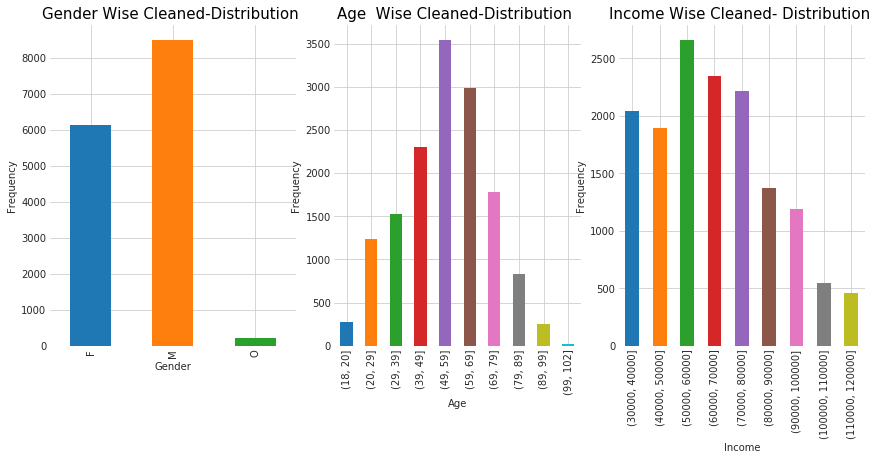

In [26]:
#Creating Subplots for distribution based on Gender,Age and Income for the Newly cleaned Profile data
sns.set_style('whitegrid')
fig,ax= plt.subplots(1,3,sharex=False, sharey=False,figsize=(12,5))
fig.tight_layout()
# Based on GENDER
cleaned_profile[cleaned_profile.columns[21:]].sum().plot.bar(ax=ax[0],fontsize=10) 
ax[0].set_title("Gender Wise Cleaned-Distribution ", fontsize=15,color='black')
ax[0].set_xlabel("Gender", fontsize=10)
ax[0].set_ylabel("Frequency", fontsize=10)
sns.despine(bottom=True, left=True)


# Based on AGE
cleaned_profile[cleaned_profile.columns[2:12]].sum().plot.bar(ax=ax[1],fontsize=10) 
ax[1].set_title("Age  Wise Cleaned-Distribution ", fontsize=15,color='black')
ax[1].set_xlabel("Age", fontsize=10)
ax[1].set_ylabel("Frequency", fontsize=10)
sns.despine(bottom=True, left=True)

# Based on INCOME
cleaned_profile[cleaned_profile.columns[12:21]].sum().plot.bar(ax=ax[2],fontsize=10) 
ax[2].set_title("Income Wise Cleaned- Distribution ", fontsize=15,color='black')
ax[2].set_xlabel("Income", fontsize=10)
ax[2].set_ylabel("Frequency", fontsize=10)
sns.despine(bottom=True, left=True)
plt.show()

# 3 transcript

In [27]:
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [28]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
event     306534 non-null object
person    306534 non-null object
time      306534 non-null int64
value     306534 non-null object
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [29]:
transcript.shape

(306534, 4)

In [30]:
def create_offer_id_column(val):
    if list(val.keys())[0] in ['offer id', 'offer_id']:
        return list(val.values())[0]
    
def create_amount_column(val):
    if list(val.keys())[0] in ["amount"]:
        return list(val.values())[0]   

In [31]:
transcript.shape

(306534, 4)

# cleaning TRASCRIPT dataset


### we will be passing the profile dataset in clean_profile which will return new dataset after one hot encoding

In [32]:
def clean_transcript(transcript = transcript):

    #
    transcript['offer_id'] = transcript.value.apply(create_offer_id_column)
    transcript['amount'] = transcript.value.apply(create_amount_column)
    
    #  One hot encoding event column
    event = pd.get_dummies(transcript['event'])
    
    # Concatinating one hot and created dataframe
    new_df = pd.concat([transcript, event], axis=1, sort=False)
    
    # Create and Drop Transaction
    transaction = new_df[new_df["transaction"]==1]
    new_df = new_df.drop(transaction.index)
    
    # Drop
    new_df = new_df.drop(columns = ["event","value", "amount", "transaction"])
    
    return new_df

In [33]:
cleaned_transcript=clean_transcript()

cleaned_transcript.shape



(167581, 6)

In [34]:
cleaned_transcript[cleaned_transcript['offer completed']==1].shape

(33579, 6)

Checking for confirmation before combing all the dataset


In [35]:
 
cleaned_portfolio.head()




,id,difficulty,duration,reward,email,mobile,social,web,bogo,discount,informational
0,ae264e3637204a6fb9bb56bc8210ddfd,10,7,10,1,1,1,0,1,0,0
1,4d5c57ea9a6940dd891ad53e9dbe8da0,10,5,10,1,1,1,1,1,0,0
2,3f207df678b143eea3cee63160fa8bed,0,4,0,1,1,0,1,0,0,1
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,7,5,1,1,0,1,1,0,0
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,20,10,5,1,0,0,1,0,1,0


In [36]:


cleaned_profile.head()


,became_member_on,id,"(18, 20]","(20, 29]","(29, 39]","(39, 49]","(49, 59]","(59, 69]","(69, 79]","(79, 89]",...,"(50000, 60000]","(60000, 70000]","(70000, 80000]","(80000, 90000]","(90000, 100000]","(100000, 110000]","(110000, 120000]",F,M,O
1,20170715,0610b486422d4921ae7d2bf64640c50b,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,20170509,78afa995795e4d85b5d9ceeca43f5fef,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
5,20180426,e2127556f4f64592b11af22de27a7932,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
8,20180209,389bc3fa690240e798340f5a15918d5c,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
12,20171111,2eeac8d8feae4a8cad5a6af0499a211d,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [37]:

cleaned_transcript.head()



,person,time,offer_id,offer completed,offer received,offer viewed
0,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0
1,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,0
2,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,0,1,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4,0,1,0
4,68617ca6246f4fbc85e91a2a49552598,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0,1,0


In [38]:
cleaned_portfolio.columns

Index(['id', 'difficulty', 'duration', 'reward', 'email', 'mobile', 'social',
       'web', 'bogo', 'discount', 'informational'],
      dtype='object')

In [39]:
cleaned_profile.columns


Index(['became_member_on',               'id',           (18, 20],
                 (20, 29],           (29, 39],           (39, 49],
                 (49, 59],           (59, 69],           (69, 79],
                 (79, 89],           (89, 99],          (99, 102],
           (30000, 40000],     (40000, 50000],     (50000, 60000],
           (60000, 70000],     (70000, 80000],     (80000, 90000],
          (90000, 100000],   (100000, 110000],   (110000, 120000],
                      'F',                'M',                'O'],
      dtype='object')

In [40]:
cleaned_transcript.columns

Index(['person', 'time', 'offer_id', 'offer completed', 'offer received',
       'offer viewed'],
      dtype='object')

## Merging all the 3 DataSet Portfolio , Profile and Trannscript for EDA

In [44]:
def merge_data():
    # Rename column name id with offer_id
    new_portfolio = cleaned_portfolio.rename(columns={"id": "offer_id" })
    
    #  Merge cleand portfolio and transcript
    final_transcript = cleaned_transcript.merge(new_portfolio[new_portfolio.columns])
    
    # Renme column id with person to merge with transcript dataset
    new_profile=cleaned_profile.rename(columns={"id": "person" })
    
    # Merge the profile with transcript on person column
    final_transcript = final_transcript.merge(new_profile[new_profile.columns])
    
    # Renaming columns (As I was getting error NOt in INdex error)
    columns_names = ['person', 'time', 'offer_id',  'offer completed', 'offer received',' offer viewed', 
 'difficulty', 'duration', 'reward', 'email', 'mobile', 'social', 'web', 'bogo', 'discount', 'informational','became_member_on',
 "18-20", "20-29", "29-39", "39-49", "49-59", "59-69", "69-79", "79-89", "89-99", "99-102", "30-40K", "40-50K", "50-60K",
 "60-70K", "70-80K", "80-90K", "90-100K", "100-110K", "110-120K", 
 'F', 'M', 'O']
    final_transcript.columns = columns_names
    
    # Reorganizing columns
    cols_order = ['person', 'offer_id', 'time', 
          'difficulty', 'duration', 'reward', 'email', 'mobile', 'social', 'web', 'bogo', 'discount', 'informational',
          'became_member_on',
          "18-20", "20-29", "29-39", "39-49", "49-59", "59-69", "69-79", "79-89", "89-99", "99-102", 'F', 'M', 'O',
          "30-40K", "40-50K", "50-60K", "60-70K", "70-80K", "80-90K", "90-100K", "100-110K", "110-120K", 
          'offer received',' offer viewed', 'offer completed'     
         ]     
    return final_transcript[cols_order]

In [45]:

merged_df = merge_data()


merged_df.head()

,person,offer_id,time,difficulty,duration,reward,email,mobile,social,web,...,50-60K,60-70K,70-80K,80-90K,90-100K,100-110K,110-120K,offer received,offer viewed,offer completed
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,5,7,5,1,1,0,1,...,0,0,0,0,1,0,0,1,0,0
1,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,6,5,7,5,1,1,0,1,...,0,0,0,0,1,0,0,0,1,0
2,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,132,5,7,5,1,1,0,1,...,0,0,0,0,1,0,0,0,0,1
3,78afa995795e4d85b5d9ceeca43f5fef,f19421c1d4aa40978ebb69ca19b0e20d,504,5,5,5,1,1,1,1,...,0,0,0,0,1,0,0,1,0,0
4,78afa995795e4d85b5d9ceeca43f5fef,f19421c1d4aa40978ebb69ca19b0e20d,510,5,5,5,1,1,1,1,...,0,0,0,0,1,0,0,0,0,1


In [46]:
merged_df.shape

(148805, 39)

In [47]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148805 entries, 0 to 148804
Data columns (total 39 columns):
person              148805 non-null object
offer_id            148805 non-null object
time                148805 non-null int64
difficulty          148805 non-null int64
duration            148805 non-null int64
reward              148805 non-null int64
email               148805 non-null int64
mobile              148805 non-null int64
social              148805 non-null int64
web                 148805 non-null int64
bogo                148805 non-null uint8
discount            148805 non-null uint8
informational       148805 non-null uint8
became_member_on    148805 non-null int64
18-20               148805 non-null uint8
20-29               148805 non-null uint8
29-39               148805 non-null uint8
39-49               148805 non-null uint8
49-59               148805 non-null uint8
59-69               148805 non-null uint8
69-79               148805 non-null uint8
79-89

# Explonatory Data Analysis (EDA)


In [48]:
merged_df.describe()

,time,difficulty,duration,reward,email,mobile,social,web,bogo,discount,...,50-60K,60-70K,70-80K,80-90K,90-100K,100-110K,110-120K,offer received,offer viewed,offer completed
count,148805.000000,148805.000000,148805.000000,148805.000000,148805.0,148805.000000,148805.000000,148805.000000,148805.000000,148805.000000,...,148805.000000,148805.000000,148805.000000,148805.000000,148805.000000,148805.000000,148805.000000,148805.000000,148805.000000,148805.000000
mean,354.570223,7.890561,6.625207,4.442445,1.0,0.917160,0.658311,0.806747,0.428978,0.418743,...,0.181358,0.159901,0.154551,0.099882,0.085407,0.037485,0.032042,0.446900,0.335069,0.218030
std,198.311301,5.041335,2.133035,3.372362,0.0,0.275641,0.474277,0.394851,0.494932,0.493355,...,0.385316,0.366515,0.361478,0.299844,0.279487,0.189948,0.176112,0.497174,0.472016,0.412909
min,0.000000,0.000000,3.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,168.000000,5.000000,5.000000,2.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,408.000000,10.000000,7.000000,5.000000,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,510.000000,10.000000,7.000000,5.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,714.000000,20.000000,10.000000,10.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
merged_df.columns

Index(['person', 'offer_id', 'time', 'difficulty', 'duration', 'reward',
       'email', 'mobile', 'social', 'web', 'bogo', 'discount', 'informational',
       'became_member_on', '18-20', '20-29', '29-39', '39-49', '49-59',
       '59-69', '69-79', '79-89', '89-99', '99-102', 'F', 'M', 'O', '30-40K',
       '40-50K', '50-60K', '60-70K', '70-80K', '80-90K', '90-100K', '100-110K',
       '110-120K', 'offer received', ' offer viewed', 'offer completed'],
      dtype='object')

In [50]:
merged_df.shape

(148805, 39)

In [51]:
#Total Records
t_records=len(merged_df.index)
print(t_records)

148805


In [52]:
#Number of offer completed
completed_offer = merged_df[merged_df["offer completed"] == 1].shape[0]
print(completed_offer)

32444


In [53]:
# Number of incomplete offer
incomplete_offer=merged_df[merged_df["offer completed"] == 0].shape[0]
print(incomplete_offer)

116361


In [54]:
# Percetage of offer completed 
percent_completed = (completed_offer / t_records) * 100
print(percent_completed)

21.80303081213669


 Now we will be creating subplots that will give us the better understanding of the data 

In [55]:
merged_df.columns

Index(['person', 'offer_id', 'time', 'difficulty', 'duration', 'reward',
       'email', 'mobile', 'social', 'web', 'bogo', 'discount', 'informational',
       'became_member_on', '18-20', '20-29', '29-39', '39-49', '49-59',
       '59-69', '69-79', '79-89', '89-99', '99-102', 'F', 'M', 'O', '30-40K',
       '40-50K', '50-60K', '60-70K', '70-80K', '80-90K', '90-100K', '100-110K',
       '110-120K', 'offer received', ' offer viewed', 'offer completed'],
      dtype='object')

In [56]:
merged_df.head()

,person,offer_id,time,difficulty,duration,reward,email,mobile,social,web,...,50-60K,60-70K,70-80K,80-90K,90-100K,100-110K,110-120K,offer received,offer viewed,offer completed
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,5,7,5,1,1,0,1,...,0,0,0,0,1,0,0,1,0,0
1,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,6,5,7,5,1,1,0,1,...,0,0,0,0,1,0,0,0,1,0
2,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,132,5,7,5,1,1,0,1,...,0,0,0,0,1,0,0,0,0,1
3,78afa995795e4d85b5d9ceeca43f5fef,f19421c1d4aa40978ebb69ca19b0e20d,504,5,5,5,1,1,1,1,...,0,0,0,0,1,0,0,1,0,0
4,78afa995795e4d85b5d9ceeca43f5fef,f19421c1d4aa40978ebb69ca19b0e20d,510,5,5,5,1,1,1,1,...,0,0,0,0,1,0,0,0,0,1


In [57]:
merged_df.shape

(148805, 39)

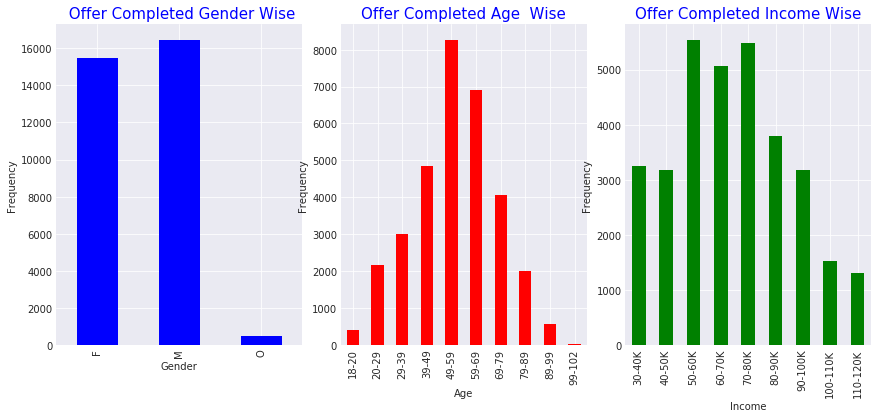

In [58]:
#Creating Subplots for distribution based on Gender,Age and Income for the Newly cleaned Profile data
sns.set_style('darkgrid')
fig,ax= plt.subplots(1,3,figsize=(12,5))
fig.tight_layout()


# BASED ON GENDER
merged_df[merged_df['offer completed']==1][['F','M','O']].sum().plot.bar(ax=ax[0],fontsize=10,color='blue') 
ax[0].set_title(" Offer Completed Gender Wise", fontsize=15,color='blue')
ax[0].set_xlabel("Gender", fontsize=10)
ax[0].set_ylabel("Frequency", fontsize=10)
sns.despine(bottom=True, left=True)


# BASED ON AGE
age_cols=['18-20','20-29', '29-39', '39-49', '49-59', '59-69', '69-79', '79-89', '89-99','99-102']
merged_df[merged_df['offer completed']==1][age_cols].sum().plot.bar(ax=ax[1],fontsize=10,color='red') 
ax[1].set_title("Offer Completed Age  Wise", fontsize=15,color='blue')
ax[1].set_xlabel("Age", fontsize=10)
ax[1].set_ylabel("Frequency", fontsize=10)
sns.despine(bottom=True, left=True)

# BASED ON INCOME
income_cols=['30-40K', '40-50K', '50-60K', '60-70K','70-80K', '80-90K', '90-100K', '100-110K','110-120K']
merged_df[merged_df['offer completed']==1][income_cols].sum().plot.bar(ax=ax[2],fontsize=10,color='green') 
ax[2].set_title("Offer Completed Income Wise", fontsize=15,color='blue')
ax[2].set_xlabel("Income", fontsize=10)
ax[2].set_ylabel("Frequency", fontsize=10)
sns.despine(bottom=True, left=True)
plt.show()

1.Based on Gender Female has completed more offers than male males have completed 16000+ offer 
  whereas female has only completed 15000+ offers so we have to focus on M and F only and we can neglect Ither gender

2. Depicting from the subplot we can see that age range 49-59 have responded most to the offer and completed them

3. As we can see from the 3rd subplot people with income range 50-80k have completed the offer ,
   we also saw a decrease in offer completion in 60-70k but that drop is comparable sso our target will be 50-80k.



In [59]:
merged_df.columns

Index(['person', 'offer_id', 'time', 'difficulty', 'duration', 'reward',
       'email', 'mobile', 'social', 'web', 'bogo', 'discount', 'informational',
       'became_member_on', '18-20', '20-29', '29-39', '39-49', '49-59',
       '59-69', '69-79', '79-89', '89-99', '99-102', 'F', 'M', 'O', '30-40K',
       '40-50K', '50-60K', '60-70K', '70-80K', '80-90K', '90-100K', '100-110K',
       '110-120K', 'offer received', ' offer viewed', 'offer completed'],
      dtype='object')

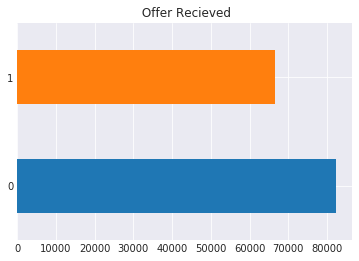

In [60]:
merged_df['offer received'].value_counts().plot.barh(title=' Offer Recieved')


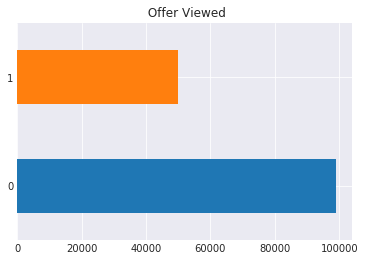

In [61]:
merged_df[' offer viewed'].value_counts().plot.barh(title=' Offer Viewed')

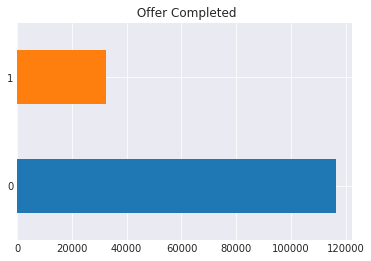

In [62]:
merged_df['offer completed'].value_counts().plot.barh(title=' Offer Completed')

This implies most customers don't pay attention to the offer that they have recieved
plus there are more number of customers who just view the offer and completely ignore it
than the one's who actually completed the offer and redeem it

In [63]:
#most used offer by customer 

#calculating bogo
merged_df['bogo'].value_counts()


0    84971
1    63834
Name: bogo, dtype: int64

In [64]:
merged_df['discount'].value_counts()

0    86494
1    62311
Name: discount, dtype: int64

In [65]:
merged_df['informational'].value_counts()

0    126145
1     22660
Name: informational, dtype: int64

from above we can clearly see that BOGO is the most popular of the all three and 
BOGO share a healthy competition with Discount offer


# DATA PREPARATION FOR MODEL


In [66]:
#removing the unnecessary feature
merged_df = merged_df.drop(["offer received", ' offer viewed', 'informational', "became_member_on"], axis=1)


In [67]:
main_feature = merged_df['offer completed']
features = merged_df.drop('offer completed', axis = 1)
print(" Number of total features: {} ".format(len(features.columns)))

 Number of total features: 34 


In [68]:
features.head()

,person,offer_id,time,difficulty,duration,reward,email,mobile,social,web,...,O,30-40K,40-50K,50-60K,60-70K,70-80K,80-90K,90-100K,100-110K,110-120K
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,5,7,5,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,6,5,7,5,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,132,5,7,5,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,78afa995795e4d85b5d9ceeca43f5fef,f19421c1d4aa40978ebb69ca19b0e20d,504,5,5,5,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
4,78afa995795e4d85b5d9ceeca43f5fef,f19421c1d4aa40978ebb69ca19b0e20d,510,5,5,5,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0


In [69]:
features.shape

(148805, 34)

In [70]:
#Normalizing Data using MinMaxScalar
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # creating scalar object

numericals = features.columns[2:6]

features_scaled = pd.DataFrame(data = features)
features_scaled[numericals] = scaler.fit_transform(features[numericals])


In [71]:
#checking scaled data 
features_scaled.head()

,person,offer_id,time,difficulty,duration,reward,email,mobile,social,web,...,O,30-40K,40-50K,50-60K,60-70K,70-80K,80-90K,90-100K,100-110K,110-120K
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.000000,0.25,0.571429,0.5,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.008403,0.25,0.571429,0.5,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.184874,0.25,0.571429,0.5,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,78afa995795e4d85b5d9ceeca43f5fef,f19421c1d4aa40978ebb69ca19b0e20d,0.705882,0.25,0.285714,0.5,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
4,78afa995795e4d85b5d9ceeca43f5fef,f19421c1d4aa40978ebb69ca19b0e20d,0.714286,0.25,0.285714,0.5,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0


In [72]:
final_features=features_scaled[features_scaled.columns[2:]]

In [73]:
final_features.head

<bound method NDFrame.head of             time  difficulty  duration  reward  email  mobile  social  web  \
0       0.000000        0.25  0.571429     0.5      1       1       0    1   
1       0.008403        0.25  0.571429     0.5      1       1       0    1   
2       0.184874        0.25  0.571429     0.5      1       1       0    1   
3       0.705882        0.25  0.285714     0.5      1       1       1    1   
4       0.714286        0.25  0.285714     0.5      1       1       1    1   
5       0.815126        0.25  0.285714     0.5      1       1       1    1   
6       0.571429        0.50  0.571429     1.0      1       1       1    0   
7       0.571429        0.50  0.571429     1.0      1       1       1    0   
8       0.714286        0.50  0.571429     1.0      1       1       1    0   
9       0.235294        0.00  0.000000     0.0      1       1       1    0   
10      0.302521        0.00  0.000000     0.0      1       1       1    0   
11      0.000000        0.25  0.57

In [74]:
# After normalizartion we will split the data using SK Learn train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(final_features, 
                                                    main_feature, 
                                                    test_size = 0.25, 
                                                    random_state = 42,
                                                   stratify=main_feature)


Checking X_train, X_test, Y_train, Y_test 

In [75]:
X_train.shape

(111603, 32)

In [76]:
X_test.shape

(37202, 32)

In [77]:
Y_train.shape

(111603,)

In [78]:
X_train.shape

(111603, 32)

# Training and Testing 



for evaluating the quality I will be using the F1 score and determine which model gives the best outcome
F1 score  best value at 100 and worst at 0.

In [79]:
# To do this we will create a function that train and test F1 along with the model name 
def train_test(clf):

    train_predictions =  (clf.fit(X_train, Y_train)).predict(X_train)
    test_predictions = (clf.fit(X_train, Y_train)).predict(X_test)
    train_f1_score   =  accuracy_score(Y_train, train_predictions)*100
    test_f1_score    = fbeta_score(Y_test, test_predictions, beta = 0.5, average='micro' )*100
    name_of_model= clf.__class__.__name__
    
    return train_f1_score, test_f1_score, name_of_model


# BENCHMARK MODEL

I chose this because As the data provided has both input and output this type of model comes in supervised learning,
the model best suited for benchmark is KNeighbours as it is fast and accurate for this type of problem

In [80]:
from sklearn.neighbors import KNeighborsClassifier
clf_A = KNeighborsClassifier(n_neighbors = 5)
a_train_f1, a_test_f1, a_model = train_test(clf_A)

In [81]:
knn = {'Benchmark Model': [ a_model], 'train F1 score':[a_train_f1], 'test F1 score': [a_test_f1]}
benchmark = pd.DataFrame(knn)

In [82]:
benchmark

,Benchmark Model,train F1 score,test F1 score
0,KNeighborsClassifier,84.58106,78.667814


## RandomForestClassifier MODEL

In [83]:
from sklearn.ensemble import RandomForestClassifier
clf_B = RandomForestClassifier(random_state = 10)
b_train_f1, b_test_f1, b_model = train_test(clf_B)

## DecisionTreeClassifier MODEL

In [84]:
from sklearn.tree import DecisionTreeClassifier 
clf_C = DecisionTreeClassifier(random_state = 10)
c_train_f1, c_test_f1, c_model = train_test(clf_C)

In [85]:
models = {'Model': ['KNeighborsClassifier (Benchmark)', b_model, c_model], 
          'train F1 score ':[a_train_f1, b_train_f1, c_train_f1], 
          'test F1 score': [a_test_f1 , b_test_f1, c_test_f1] }
          
comparison = pd.DataFrame(models)

In [86]:
comparison

,Model,train F1 score,test F1 score
0,KNeighborsClassifier (Benchmark),84.581060,78.667814
1,RandomForestClassifier,91.734989,78.786087
2,DecisionTreeClassifier,92.813813,79.710768


From this comparision we can clearly see that DecisionTreeClassifier and RandomForestClassifier have almost similar result 
but DecisionTree is a bit better than RandomForestClassifier as it has achived a better accuracy
SO DECISIONTREE would be a better classifying model

# Conclusion


Here’s the basic outline of the approach used in the project:-
1) Data Exploration and Pre-processing :-
 	1.1) cleaning the data
  1.2) processing the data and merging data from offer portfolio, customer profile, and   transaction for analysing.

Starbuck’s Dataset simulates how people make purchasing decisions and how these decisions 
are influenced by promotional offers provided by the app

We began this project by first exploring, cleaning the data,
merging the three data before proceeding to find answers to our primarily driven queries

2)Perform Exploratory Data Analysis on the Data.

3) Building machine learning model to determine which is the most suitable.
4) Using Evaluation Metric for determination of best model
5) Summarize the prediction - 
     We Found out that DECISIONTREE would be a better choice as a model for this problem as it has shown better result
    than other models and Has Better Accuracy
